In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
import scikitplot as skplt

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [10]:
df = pd.read_csv('../dataset/data_normalized.csv')
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,0.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [11]:
X = (df.drop(['diagnosis'],axis=1)).values
y = df['diagnosis'].astype(int)

# SVM

https://scikit-learn.org/stable/modules/svm.html


SVM

Teste
Acurácia :  0.9824406148113647
Precisão :  0.9739927449948773
Recall   :  0.9953482082488169
F1 score :  0.9843408962454132

Treino
Acurácia :  0.9828658183921343
Precisão :  0.9778554806553783
Recall   :  0.9948937619806462
F1 score :  0.9862969753621424


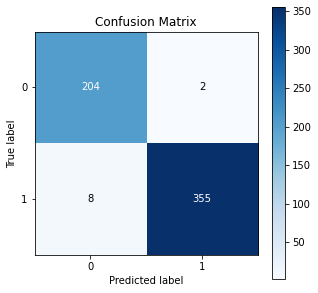

In [12]:
clf = svm.SVC()

accuracy_teste = []
precision_teste = []
recall_teste = []
f1_teste = []

accuracy_train = []
precision_train = []
recall_train = []
f1_train = []

predict_teste = []
true_teste = []
predict_train = []
true_train = []

cv = KFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in cv.split(X):

    data_train = X[train_index]
    data_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    clf.fit(data_train, y_train)
    
    pred_teste = clf.predict(data_test)
    ac = accuracy_score(y_test, pred_teste)
    prec = precision_score(y_test, pred_teste, average='binary')
    rec = recall_score(y_test, pred_teste, average='binary')
    f1 = f1_score(y_test, pred_teste, average='binary')
    
    precision_teste.append(prec)
    accuracy_teste.append(ac)
    recall_teste.append(rec)
    f1_teste.append(f1)
    
    pred_train = clf.predict(data_train)
    ac = accuracy_score(y_train, pred_train)
    prec = precision_score(y_train, pred_train, average='binary')
    rec = recall_score(y_train, pred_train, average='binary')
    f1 = f1_score(y_train, pred_train, average='binary')
    
    precision_train.append(prec)
    accuracy_train.append(ac)
    recall_train.append(rec)
    f1_train.append(f1)
    
    
    for p, r in zip(pred_teste, y_test):
        predict_teste.append(p)
        true_teste.append(r)
        
    for p, r in zip(pred_train, y_train):
        predict_train.append(p)
        true_train.append(r)
        
print("\nSVM")
print("\nTeste")
print("Acurácia : ", np.mean(accuracy_teste))
print("Precisão : ", np.mean(precision_teste))
print("Recall   : ", np.mean(recall_teste))
print("F1 score : ", np.mean(f1_teste))Naive Bayes

print("\nTreino")
print("Acurácia : ", np.mean(accuracy_train))
print("Precisão : ", np.mean(precision_train))
print("Recall   : ", np.mean(recall_train))
print("F1 score : ", np.mean(f1_train))

skplt.metrics.plot_confusion_matrix(
    predict_teste, 
    true_teste,
    figsize=(5,5))
plt.show()

# Gradient Boosting Classifier

https://scikit-learn.org/stable/search.html?q=GradientBoostingClassifier


Gradient Boosting Classifier

Teste
Acurácia :  0.952616053407856
Precisão :  0.9461091644204853
Recall   :  0.9665620583373473
F1 score :  0.9554087783990146

Treino
Acurácia :  1.0
Precisão :  1.0
Recall   :  1.0
F1 score :  1.0


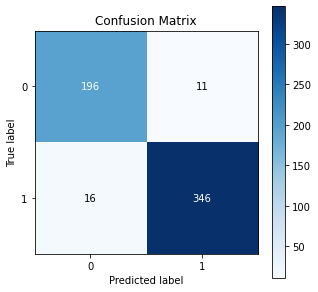

In [13]:
clf = GradientBoostingClassifier()

accuracy_teste = []
precision_teste = []
recall_teste = []
f1_teste = []

accuracy_train = []
precision_train = []
recall_train = []
f1_train = []

predict_teste = []
true_teste = []
predict_train = []
true_train = []

cv = KFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in cv.split(X):

    data_train = X[train_index]
    data_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
Naive Bayes
    clf.fit(data_train, y_train)
    
    pred_teste = clf.predict(data_test)
    ac = accuracy_score(y_test, pred_teste)
    prec = precision_score(y_test, pred_teste, average='binary')
    rec = recall_score(y_test, pred_teste, average='binary')
    f1 = f1_score(y_test, pred_teste, average='binary')
    
    precision_teste.append(prec)
    accuracy_teste.append(ac)
    recall_teste.append(rec)
    f1_teste.append(f1)
    
    pred_train = clf.predict(data_train)
    ac = accuracy_score(y_train, pred_train)
    prec = precision_score(y_train, pred_train, average='binary')
    rec = recall_score(y_train, pred_train, average='binary')
    f1 = f1_score(y_train, pred_train, average='binary')
    
    precision_train.append(prec)
    accuracy_train.append(ac)
    recall_train.append(rec)
    f1_train.append(f1)
    
    
    for p, r in zip(pred_teste, y_test):
        predict_teste.append(p)
        true_teste.append(r)
        
    for p, r in zip(pred_train, y_train):
        predict_train.append(p)
        true_train.append(r)
        
print("\nGradient Boosting Classifier")
print("\nTeste")
print("Acurácia : ", np.mean(accuracy_teste))
print("Precisão : ", np.mean(precision_teste))
print("Recall   : ", np.mean(recall_teste))
print("F1 score : ", np.mean(f1_teste))

print("\nTreino")
print("Acurácia : ", np.mean(accuracy_train))
print("Precisão : ", np.mean(precision_train))
print("Recall   : ", np.mean(recall_train))
print("F1 score : ", np.mean(f1_train))

skplt.metrics.plot_confusion_matrix(
    predict_teste, 
    true_teste,
    figsize=(5,5))
plt.show()

# Stochastic Gradient Descent

https://scikit-learn.org/0.17/modules/sgd.html#classification


SGD Classifier

Teste
Acurácia :  0.9701288619779538
Precisão :  0.9716357519549008
Recall   :  0.9746894523876621
F1 score :  0.973040751158179

Treino
Acurácia :  0.9683757470599577
Precisão :  0.9670102043130584
Recall   :  0.9833168792468235
F1 score :  0.9746046247664181


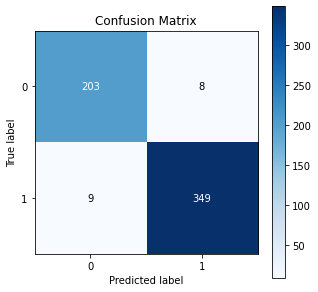

In [14]:
clf = SGDClassifier()

accuracy_teste = []
precision_teste = []
recall_teste = []
f1_teste = []

accuracy_train = []
precision_train = []
recall_train = []
f1_train = []

predict_teste = []
true_teste = []
predict_train = []
true_train = []

cv = KFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in cv.split(X):

    data_train = X[train_index]
    data_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    clf.fit(data_train, y_train)
    
    pred_teste = clf.predict(data_test)
    ac = accuracy_score(y_test, pred_teste)
    prec = precision_score(y_test, pred_teste, average='binary')
    rec = recall_score(y_test, pred_teste, average='binary')
    f1 = f1_score(y_test, pred_teste, average='binary')
    
    precision_teste.append(prec)
    accuracy_teste.append(ac)
    recall_teste.append(rec)
    f1_teste.append(f1)
    
    pred_train = clf.predict(data_train)
    ac = accuracy_score(y_train, pred_train)
    prec = precision_score(y_train, pred_train, average='binary')
    rec = recall_score(y_train, pred_train, average='binary')
    f1 = f1_score(y_train, pred_train, average='binary')Naive Bayes
    
    precision_train.append(prec)
    accuracy_train.append(ac)
    recall_train.append(rec)
    f1_train.append(f1)
    
    
    for p, r in zip(pred_teste, y_test):
        predict_teste.append(p)
        true_teste.append(r)
        
    for p, r in zip(pred_train, y_train):
        predict_train.append(p)
        true_train.append(r)
        
print("\nSGD Classifier")
print("\nTeste")
print("Acurácia : ", np.mean(accuracy_teste))
print("Precisão : ", np.mean(precision_teste))
print("Recall   : ", np.mean(recall_teste))
print("F1 score : ", np.mean(f1_teste))

print("\nTreino")
print("Acurácia : ", np.mean(accuracy_train))
print("Precisão : ", np.mean(precision_train))
print("Recall   : ", np.mean(recall_train))
print("F1 score : ", np.mean(f1_train))

skplt.metrics.plot_confusion_matrix(
    predict_teste, 
    true_teste,
    figsize=(5,5))
plt.show()

# Decision Tree

https://scikit-learn.org/0.17/modules/tree.html#classification


Decision Tree

Teste
Acurácia :  0.9085235211923613
Precisão :  0.9310897435897436
Recall   :  0.9167880227673862
F1 score :  0.9220993213195193

Treino
Acurácia :  1.0
Precisão :  1.0
Recall   :  1.0
F1 score :  1.0


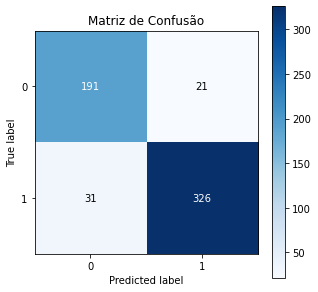

In [15]:
clf = tree.DecisionTreeClassifier()

accuracy_teste = []
precision_teste = []
recall_teste = []
f1_teste = []

accuracy_train = []Naive Bayes
precision_train = []
recall_train = []
f1_train = []

predict_teste = []
true_teste = []
predict_train = []
true_train = []

cv = KFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in cv.split(X):

    data_train = X[train_index]
    data_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    clf.fit(data_train, y_train)
    
    pred_teste = clf.predict(data_test)
    ac = accuracy_score(y_test, pred_teste)
    prec = precision_score(y_test, pred_teste, average='binary')
    rec = recall_score(y_test, pred_teste, average='binary')
    f1 = f1_score(y_test, pred_teste, average='binary')
    
    precision_teste.append(prec)
    accuracy_teste.append(ac)
    recall_teste.append(rec)
    f1_teste.append(f1)
    Naive Bayes
    pred_train = clf.predict(data_train)
    ac = accuracy_score(y_train, pred_train)
    prec = precision_score(y_train, pred_train, average='binary')
    rec = recall_score(y_train, pred_train, average='binary')
    f1 = f1_score(y_train, pred_train, average='binary')
    
    precision_train.append(prec)
    accuracy_train.append(ac)
    recall_train.append(rec)
    f1_train.append(f1)
    
    
    for p, r in zip(pred_teste, y_test):
        predict_teste.append(p)
        true_teste.append(r)
        
    for p, r in zip(pred_train, y_train):
        predict_train.append(p)
        true_train.append(r)
        
print("\nDecision Tree")
print("\nTeste")
print("Acurácia : ", np.mean(accuracy_teste))
print("Precisão : ", np.mean(precision_teste))
print("Recall   : ", np.mean(recall_teste))
print("F1 score : ", np.mean(f1_teste))

print("\nTreino")
print("Acurácia : ", np.mean(accuracy_train))
print("Precisão : ", np.mean(precision_train))
print("Recall   : ", np.mean(recall_train))
print("F1 score : ", np.mean(f1_train))

skplt.metrics.plot_confusion_matrix(

    title='Matriz de Confusão',
    y_pred = predict_teste, 
    y_true = true_teste,
    figsize=(5,5))

# Gaussian Naive Bayes

https://scikit-learn.org/0.17/modules/naive_bayes.html#bernoulli-naive-bayes


Naive Bayes

Teste
Acurácia :  0.9296848315478963
Precisão :  0.9265098375113417
Recall   :  0.9499018461907605
F1 score :  0.9372205053092115

Treino
Acurácia :  0.9393666859456333
Precisão :  0.9407337018261325
Recall   :  0.9634357066797072
F1 score :  0.9519278005152563


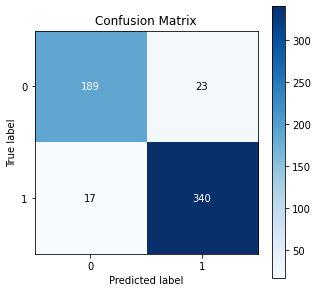

In [20]:
clf = GaussianNB()

accuracy_teste = []
precision_teste = []
recall_teste = []
f1_teste = []

accuracy_train = []
precision_train = []
recall_train = []
f1_train = []

predict_teste = []
true_teste = []
predict_train = []
true_train = []

cv = KFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in cv.split(X):

    data_train = X[train_index]
    data_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    clf.fit(data_train, y_train)
    
    pred_teste = clf.predict(data_test)
    ac = accuracy_score(y_test, pred_teste)
    prec = precision_score(y_test, pred_teste, average='binary')
    rec = recall_score(y_test, pred_teste, average='binary')
    f1 = f1_score(y_test, pred_teste, average='binary')
    
    precision_teste.append(prec)
    accuracy_teste.append(ac)
    recall_teste.append(rec)
    f1_teste.append(f1)
    
    pred_train = clf.predict(data_train)
    ac = accuracy_score(y_train, pred_train)
    prec = precision_score(y_train, pred_train, average='binary')
    rec = recall_score(y_train, pred_train, average='binary')
    f1 = f1_score(y_train, pred_train, average='binary')
    
    precision_train.append(prec)
    accuracy_train.append(ac)
    recall_train.append(rec)
    f1_train.append(f1)
    
    
    for p, r in zip(pred_teste, y_test):
        predict_teste.append(p)
        true_teste.append(r)
        
    for p, r in zip(pred_train, y_train):
        predict_train.append(p)
        true_train.append(r)
        
print("\nNaive Bayes")
print("\nTeste")
print("Acurácia : ", np.mean(accuracy_teste))
print("Precisão : ", np.mean(precision_teste))
print("Recall   : ", np.mean(recall_teste))
print("F1 score : ", np.mean(f1_teste))

print("\nTreino")
print("Acurácia : ", np.mean(accuracy_train))
print("Precisão : ", np.mean(precision_train))
print("Recall   : ", np.mean(recall_train))
print("F1 score : ", np.mean(f1_train))

skplt.metrics.plot_confusion_matrix(
    y_pred = predict_teste, 
    y_true = true_teste,
    figsize=(5,5))